# Data Analysis for Extension Project

1. Compare registered voters vs. non-registered voters per zip code
2. Number of properties for registered voters vs non-registered voters
3. Demographics + party affiliation of owners who vote

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import re
import numpy as np

### loading data

In [3]:
boston_voters = pd.read_csv("./data/boston_voters.csv", index_col=0, low_memory= False)
all_housing = pd.read_csv("../deliverable1/data/property-data.csv", low_memory= False)
income_restricted = pd.read_csv("../deliverable1/data/affordable-housing-addresses.csv", low_memory= False)

In [149]:
boston_voters.head()

,SEQUENCE,LALVOTERID,Voters_Active,Voters_StateVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_Landline7Digit,VoterTelephones_LandlineFormatted,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,VoterTelephones_CellPhoneOnly,...,ElectionReturns_P20PrecinctTurnoutRepublicans,FECDonors_AvgDonation,FECDonors_AvgDonation_Range,FECDonors_LastDonationDate,FECDonors_NumberOfDonations,FECDonors_PrimaryRecipientOfContributions,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range,formatted_address,formatted_name
52546,52547,LALMA161664455,A,04MJN2736002,NaN,NaN,NaN,NaN,NaN,NaN,...,36%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 Devonshire 02109,MENNA JOAN T
1257750,1257751,LALMA161348431,A,08HSN1391000,NaN,NaN,NaN,NaN,NaN,True,...,24%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25 Aberdeen 02215,HUTCHINS SHANNON E
3085777,3085778,LALMA517961810,A,08PMY1392001,NaN,NaN,NaN,NaN,NaN,NaN,...,28%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83 Dartmouth 02116,PARIZEAU MOLLY
3525516,3525517,LALMA162924235,I,08FJN2186001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110 Arlington 02116,FANG JASON
3525517,3525518,LALMA583701049,I,06BAL2785000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110 Arlington 02116,BEYDOUN AARON-MICAEL N


In [152]:
all_housing.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,,100001000.0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,3,A - Average,NaN
1,100002000,,100002000.0,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0,NaN,0,A - Average,NaN
2,100003000,,100003000.0,199,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0,NaN,0,A - Average,NaN
3,100004000,,100004000.0,201,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN
4,100005000,,100005000.0,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN


### Isolating street name, street number, zip code

In [4]:
def extract_street(x):
    street = re.sub(r'[^a-zA-Z ]', '', x).split()
    return " ".join(street[:-1])

def extract_zip(x):
    found = re.search("\d{5}", x)
    if found is None:
        return ''
    else:
        return found.group(0)

street_address = income_restricted["formatted_address"].str.split(",", expand = True)[0].fillna("")

income_restricted["street_num"] = street_address.str.split(expand = True)[0].astype(str)
income_restricted["street_name"] = street_address.apply(lambda x: extract_street(x)).astype(str)
income_restricted["zip_code"] = income_restricted["formatted_address"].fillna('').apply(lambda x: extract_zip(x)).astype(str)

In [5]:
boston_voters["Residence_Addresses_Zip"] = boston_voters["Residence_Addresses_Zip"].astype(int).astype(str).apply(lambda x:  "0" + x if len(x) == 4  else x)

In [7]:
valid_address = income_restricted.loc[~income_restricted["formatted_address"].isna()]
valid_address.head()

,Project Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8,formatted_address,street_num,street_name,zip_code
0,Abbot Street/ Shawmut Ave,Roxbury,2119,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN,"100 Shawmut Ave, Boston, MA 02118, United States",100,Shawmut,02118
1,Academy Homes I,Roxbury,2119,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN,"1592 Columbus Ave, Roxbury, MA 02119, United S...",1592,Columbus,02119
2,Academy Homes II,Roxbury,2119,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y,"2926 Washington St, Roxbury, MA 02119, United ...",2926,Washington,02119
3,Adams Court Phase A,Mattapan,2126,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN,"59 Msgr Patrick J Lydon Way, Boston, MA 02124,...",59,Msgr Patrick J Lydon,02124
5,Adams Templeton Elderly Housing,Dorchester,2124,76,76,0,1.0,1.0,0.0,75,75,0.0,Rental,Private,Y,Y,"445 Adams St, Dorchester, MA 02122, United States",445,Adams,02122


In [8]:
valid_address["formatted_address"] = valid_address[["street_num", "street_name", "zip_code"]].apply(lambda x: ' '.join(x.values), axis = 1)
boston_voters["formatted_address"] = boston_voters[["Residence_Addresses_HouseNumber","Residence_Addresses_StreetName", "Residence_Addresses_Zip"]].fillna('').apply(lambda x: ' '.join(x.values), axis = 1)

/var/folders/1f/1096m7l50dsgdq50_zg0pbvr0000gn/T/ipykernel_17417/235942805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_address["formatted_address"] = valid_address[["street_num", "street_name", "zip_code"]].apply(lambda x: ' '.join(x.values), axis = 1)


In [9]:
cols1 = ["formatted_address", "Tenure"]
cols2 = ["formatted_address","Voters_Gender", "Voters_Age", "Parties_Description", "Ethnic_Description"]   

overlayed = pd.merge(valid_address[cols1], 
                        boston_voters[cols2],
                        how = "left",
                        left_on = "formatted_address",
                        right_on = "formatted_address")

In [10]:
voters = overlayed.dropna()
nonvoters = overlayed.loc[~overlayed["Voters_Gender"].isna()]

## Overlay all_housing and boston_voters datasets

### overlay with address

In [11]:
owner_occupied = all_housing.loc[all_housing["OWN_OCC"] == "Y"]

def clean(x):
    vals = x.values
    return str(vals[0]).strip() + ' ' + ' '.join(vals[1].split()[:-1]).title() + ' ' + str(vals[2])

In [12]:
owner_occupied["ZIPCODE"] = owner_occupied["ZIPCODE"].astype(str).apply(lambda x: '0' + x if len(x) == 4 else x)
address_cols = ["ST_NUM","ST_NAME","ZIPCODE"]
owner_occupied["formatted_address"] = owner_occupied[address_cols].apply(lambda x: clean(x), axis = 1)
owner_occupied.head()

/var/folders/1f/1096m7l50dsgdq50_zg0pbvr0000gn/T/ipykernel_17417/1700170388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_occupied["ZIPCODE"] = owner_occupied["ZIPCODE"].astype(str).apply(lambda x: '0' + x if len(x) == 4 else x)
/var/folders/1f/1096m7l50dsgdq50_zg0pbvr0000gn/T/ipykernel_17417/1700170388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_occupied["formatted_address"] = owner_occupied[address_cols].apply(lambda x: clean(x), axis = 1)


,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT,formatted_address
0,100001000,,100001000.0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,02128,1.0,1,...,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,3,A - Average,NaN,104 A 104 Putnam 02128
1,100002000,,100002000.0,197,LEXINGTON ST,NaN,EAST BOSTON,02128,1.0,1,...,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0,NaN,0,A - Average,NaN,197 Lexington 02128
4,100005000,,100005000.0,203,LEXINGTON ST,NaN,EAST BOSTON,02128,1.0,1,...,NaN,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN,203 Lexington 02128
7,100008000,,100008000.0,213,LEXINGTON ST,NaN,EAST BOSTON,02128,1.0,1,...,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN,213 Lexington 02128
10,100011000,,100011000.0,219,LEXINGTON ST,NaN,EAST BOSTON,02128,1.0,1,...,NaN,F - Forced Hot Air,NaN,C - Central AC,0,NaN,0,A - Average,NaN,219 Lexington 02128


In [13]:
cols1 = ["formatted_address"]
cols2 = ["formatted_address","Voters_Gender", "Voters_Age", "Parties_Description", "Ethnic_Description"] 

owner_occ_overlay = pd.merge(owner_occupied[cols1], 
                        boston_voters[cols2],
                        how = "left",
                        left_on = "formatted_address",
                        right_on = "formatted_address")

### overlay using owner name

In [14]:
name_cols = ['Voters_FirstName', 'Voters_MiddleName', 'Voters_LastName']
boston_voters[name_cols]

def agg_names(x):
    name = x.values
    if type(name[1]) != str:
        return name[2].upper() + ' ' + name[0].upper()
    else:
        return name[2].upper() + ' ' + name[0].upper() + ' ' + name[1][0]

test = boston_voters[name_cols].iloc[371183,:]

boston_voters["formatted_name"] = boston_voters[name_cols].apply(lambda x: agg_names(x), axis = 1)

In [153]:
cols1 = ["OWNER","ZIPCODE", "RES_UNITS"]
cols2 = ["formatted_name","Voters_Gender", "Voters_Age", "Parties_Description", "Ethnic_Description"] 

owner_occ_overlay = pd.merge(owner_occupied[cols1], 
                        boston_voters[cols2],
                        how = "left",
                        left_on = "OWNER",
                        right_on = "formatted_name")

## Extension Questions

### Q1: Looking at distirbution of voters vs non-voters

In [154]:
registered_owner_occ = owner_occ_overlay.loc[~owner_occ_overlay["formatted_name"].isna()]
unregistered_owner_occ = owner_occ_overlay.loc[owner_occ_overlay["formatted_name"].isna()]

In [59]:
registered_zip_counts = registered_owner_occ["ZIPCODE"].value_counts()
unregistered_zip_counts = unregistered_owner_occ["ZIPCODE"].value_counts()

zip_counts = pd.merge(registered_zip_counts, unregistered_zip_counts, how = "outer", left_index = True, right_index = True).fillna(0)
zip_counts["total"] = zip_counts["ZIPCODE_x"] + zip_counts["ZIPCODE_y"]
zip_counts = zip_counts.sort_values("total", ascending = False)
zip_counts.head()

,ZIPCODE_x,ZIPCODE_y,total
02132,3681.0,4022,7703.0
02130,2867.0,3722,6589.0
02124,2988.0,3453,6441.0
02127,2629.0,3775,6404.0
02136,2972.0,3263,6235.0


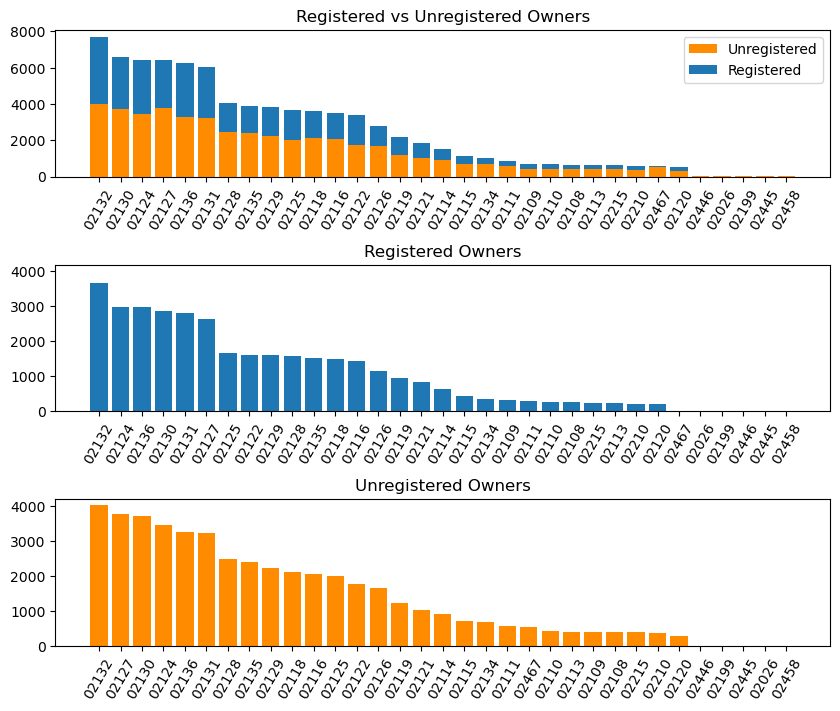

In [148]:
fig, axes = plt.subplots(3, 1, figsize = (10,8))
plt.subplots_adjust(hspace=0.6)
axes[0].set_title("Registered vs Unregistered Owners")
axes[0].bar(zip_counts.index, zip_counts["ZIPCODE_y"], label = "Unregistered", color = 	"#FF8C00")
axes[0].bar(zip_counts.index, zip_counts["ZIPCODE_x"], bottom=zip_counts["ZIPCODE_y"], label = "Registered")
axes[0].legend()
axes[0].set_xticks(zip_counts.index)
axes[0].set_xticklabels(zip_counts.index, rotation = 60, fontsize = 10)

sorted_x = zip_counts.sort_values("ZIPCODE_x", ascending = False)
axes[1].set_title("Registered Owners")
axes[1].bar(sorted_x.index, sorted_x["ZIPCODE_x"])
axes[1].set_xticks(sorted_x.index)
axes[1].set_xticklabels(sorted_x.index, rotation = 60, fontsize = 10)
axes[1].set_ylim(0,4200)

sorted_y = zip_counts.sort_values("ZIPCODE_y", ascending = False)
axes[2].set_title("Unregistered Owners")
axes[2].bar(sorted_y.index, sorted_y["ZIPCODE_y"],color = "#FF8C00")
axes[2].set_xticks(sorted_y.index)
axes[2].set_xticklabels(sorted_y.index, rotation = 60, fontsize = 10)
axes[2].set_ylim(0,4200)

plt.show()

In [88]:
prop = zip_counts["ZIPCODE_y"]/zip_counts["total"] * 100
prop.mean()

61.161792086078094

### Q2: Proportion of Properties

In [155]:
print(len(registered_owner_occ) / len(owner_occ_overlay), len(unregistered_owner_occ)/len(owner_occ_overlay))


0.431272318152913 0.568727681847087


In [156]:
registered_units = registered_owner_occ["RES_UNITS"].sum()
unregistered_units = unregistered_owner_occ["RES_UNITS"].sum()

total = registered_units + unregistered_units

print(registered_units / total, unregistered_units / total)

0.4074094927087439 0.5925905072912562


### Q3: Looking at registers voter-owner demographics

In [33]:
registered_owner_occ.head()

,OWNER,ZIPCODE,formatted_name,Voters_Gender,Voters_Age,Parties_Description,Ethnic_Description
0,PASCUCCI CARLO,02128,PASCUCCI CARLO,M,62.0,Non-Partisan,Italian
6,MENDEZ DAVID,02128,MENDEZ DAVID,M,59.0,Democratic,Hispanic
13,RICCIARDELLI ANTHONY E,02128,RICCIARDELLI ANTHONY E,M,74.0,Non-Partisan,Italian
14,CIOTO ROBERT M,02128,CIOTO ROBERT M,M,66.0,Democratic,Italian
16,POSADA MARIA M,02128,POSADA MARIA M,F,56.0,Non-Partisan,Hispanic


In [32]:
# exporting so all values can be seen
registered_owner_occ.groupby("ZIPCODE")["Ethnic_Description"].value_counts().to_csv("./results/reg_eth_zip.csv")
registered_owner_occ.groupby("ZIPCODE")["Parties_Description"].value_counts().to_csv("./results/reg_parties_zip.csv")
registered_owner_occ.groupby("ZIPCODE")["Voters_Gender"].value_counts().to_csv("./results/reg_gender_zip.csv")

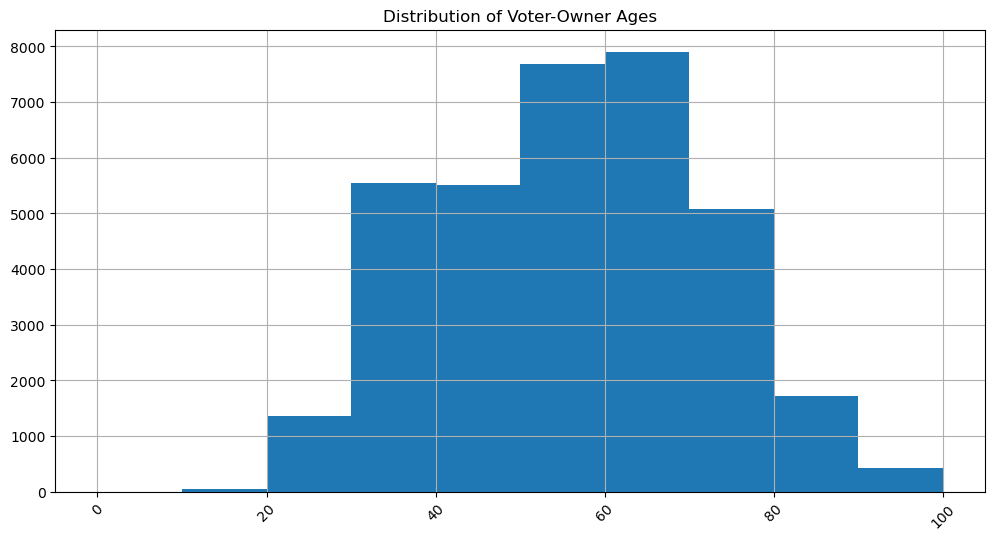

In [65]:
# Distribution of Ages of Voter-Owners
plt.figure(figsize = (12,6))
plt.title("Distribution of Voter-Owner Ages")
plt.hist(registered_owner_occ["Voters_Age"], bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [95]:
registered_owner_occ["Voters_Age"].describe()

count    35252.000000
mean        55.623879
std         15.795360
min         18.000000
25%         43.000000
50%         57.000000
75%         67.000000
max         99.000000
Name: Voters_Age, dtype: float64

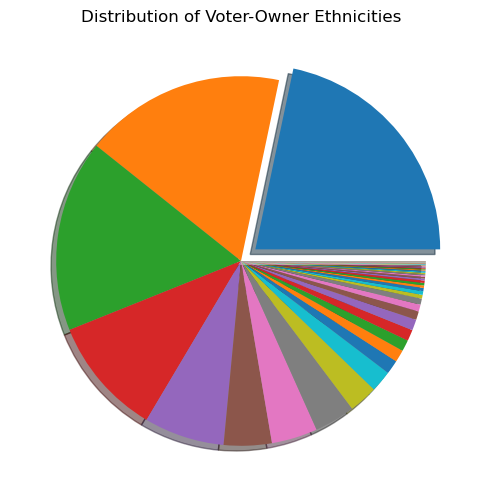

In [92]:
# Distribution of Ages of Voter-Owners
ethnicity_counts = registered_owner_occ["Ethnic_Description"].value_counts()
percentages = ethnicity_counts/sum(ethnicity_counts) * 100
explode = [0.1] + [0]*(len(percentages) - 1)
plt.figure(figsize = (12,6))
plt.title("Distribution of Voter-Owner Ethnicities")
plt.pie(percentages, shadow = True, explode=explode, pctdistance=-.1)
plt.show()

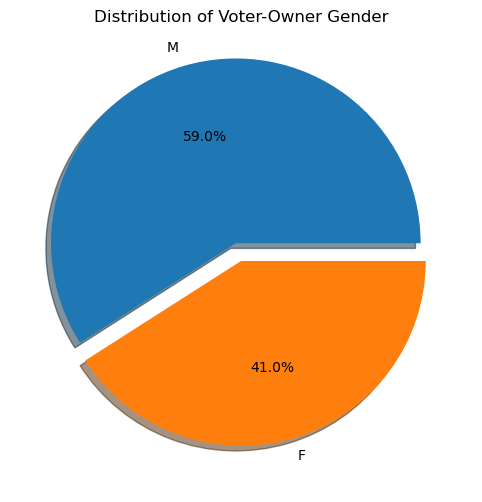

In [81]:
# Distribution of Ages of Voter-Owners
gender_counts = registered_owner_occ["Voters_Gender"].value_counts()
percentages = gender_counts/sum(gender_counts) * 100
explode = [0.1] + [0]*(len(percentages) - 1)
plt.figure(figsize = (12,6))
plt.title("Distribution of Voter-Owner Gender")
plt.pie(percentages, shadow = True, explode=explode, labels = percentages.index, autopct='%1.1f%%')
plt.show()

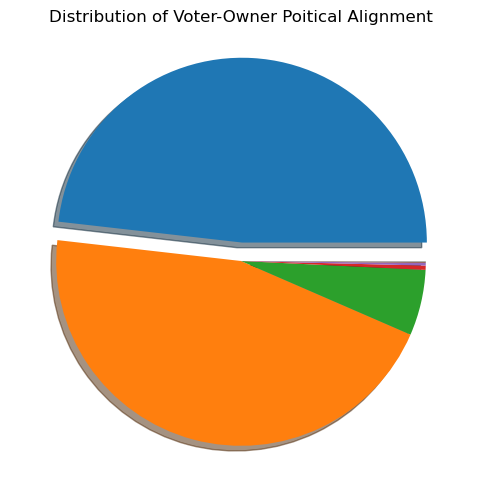

In [96]:
# Distribution of Party Alignment of Voter-Owners
parties_counts = registered_owner_occ["Parties_Description"].value_counts()
percentages = parties_counts/sum(parties_counts) * 100
explode = [0.1] + [0]*(len(percentages) - 1)
plt.figure(figsize = (12,6))
plt.title("Distribution of Voter-Owner Poitical Alignment")
plt.pie(percentages, shadow = True, explode=explode)
plt.show()